<a href="https://colab.research.google.com/github/jnegrete85/ContinuousTransitions/blob/main/Continuous_Transitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jupyter Notebook - Continuous Transitions in Job Posting Trends Across Fields: A Temporal Perspective ##

### License: Creative Commons Attribution 4.0 International (CC BY 4.0)
This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).
© 2025 [Jose Negrete Jr]

## Installing fredapi

In [1]:
pip install fredapi

### List of job fields analyzed along with their corresponding code to download from the FRED  - Federal Reserve Economic Data ###

In [2]:
List_Data = ['IHLIDXUSTPSOFTDEVE', #Software Development Job Postings on Indeed in the United States
             'IHLIDXUSTPBAFI', # Banking and Finance Job Postings on Indeed in the United States
    'IHLIDXUSTPCONS', #Construction Job Postings on Indeed in the United States
    'IHLIDXUSTPMARK', # Marketing Job Postings on Indeed in the United States
    'IHLIDXUSTPHOTO', # Hospitality and Tourism Job Postings on Indeed in the United States
    'IHLIDXUSTPACCO', # Accounting Job Postings on Indeed in the United States
    'IHLIDXUSTPRETA', # Retail Job Postings on Indeed in the United States
    'IHLIDXUSTPNURS', # Nursing Job Postings on Indeed in the United States
    'IHLIDXUSTPELECENGI', # Electrical Engineering Job Postings on Indeed in the United States
    'IHLIDXUSTPHUMARESO', # Human Resources Job Postings on Indeed in the United States
    'IHLIDXUSTPSCREDE', # Scientific Research and Development Job Postings on Indeed in the United States
    'IHLIDXUSTPPRMA', # Production and Manufacturing Job Postings on Indeed in the United States
    'IHLIDXUSTPSALE', # Sales Job Postings on Indeed in the United States
    'IHLIDXUSTPPROJMANA', # Project Management Job Postings on Indeed in the United States
    'IHLIDXUSTPCIVIENGI', # Civil Engineering Job Postings on Indeed in the United States
    'IHLIDXUSTPDRIV', # Driving Job Postings on Indeed in the United States
    'IHLIDXUSTPFOPRSE', # Food Preparation and Service Job Postings on Indeed in the United States
    'IHLIDXUSTPPHSU', #Physicians and Surgeons Job Postings on Indeed in the United States
    'IHLIDXUSTPMANA', # Management Job Postings on Indeed in the United States
    'IHLIDXUSTPINDEDO', # Information Design and Documentation Job Postings on Indeed in the United States
    'IHLIDXUSTPCUSTSERV', # Customer Service Job Postings on Indeed in the United States
    'IHLIDXUSTPDENT', # Dental Job Postings on Indeed in the United States
    'IHLIDXUSTPMATH', # Mathematics Job Postings on Indeed in the United States
    'IHLIDXUSTPCHIL', # Childcare Job Postings on Indeed in the United States
    'IHLIDXUSTPLEGA', # Legal Job Postings on Indeed in the United States
    'IHLIDXUSTPLOST', # Loading and Stocking Job Postings on Indeed in the United States
    'IHLIDXUSTPCLSA', # Cleaning and Sanitation Job Postings on Indeed in the United States
    'IHLIDXUSTPLOGISUPP', # Logistic Support Job Postings on Indeed in the United States
    'IHLIDXUSTPINSU',  # Insurance Job Postings on Indeed in the United States
    'IHLIDXUSTPARCH', # Architecture Job Postings on Indeed in the United States
    'IHLIDXUSTPBEWE', # Beauty and Wellness Job Postings on Indeed in the United States
    'IHLIDXUSTPVETE', # Veterinary Job Postings on Indeed in the United States
    'IHLIDXUSTPMECO', # Media and Communications Job Postings on Indeed in the United States
    'IHLIDXUSTPTHER', # Therapy Job Postings on Indeed in the United States
    'IHLIDXUSTPPHAR', # Pharmacy Job Postings on Indeed in the United States
    'IHLIDXUSTPEDIN', # Education and Instruction Job Postings on Indeed in the United States
    'IHLIDXUSTPMEDITECH', # Medical Technician Job Postings on Indeed in the United States
    'IHLIDXUSTPCOSOSE', # Community and Social Service Job Postings on Indeed in the United States
    'IHLIDXUSTPSEPUSA', # Security and Public Safety Job Postings on Indeed in the United States
    'IHLIDXUSTPSPOR', # Sports Job Postings on Indeed in the United States
    'IHLIDXUSTPPECAHOHE', # Personal Care and Home Health Job Postings on Indeed in the United States
    'IHLIDXUSTPADMIASSI', # Administrative Assistance Job Postings on Indeed in the United States
    'IHLIDXUSTPMEDIINFO', # Medical Information Job Postings on Indeed in the United States
    'IHLIDXUSTPAREN', # Arts and Entertainment Job Postings on Indeed in the United States
    'IHLIDXUSTPINMA' # Installation and Maintenance Job Postings on Indeed in the United States
]

In [3]:
Labels = ['Software Development',
             'Banking and Finance',
    'Construction',
    'Marketing',
    'Hospitality and Tourism',
    'Accounting',
    'Retail',
    'Nursing',
    'Electrical Engineering',
    'Human Resources',
    'Scientific Research and Development',
    'Production and Manufacturing',
    'Sales Job',
    'Project Management',
    'Civil Engineering',
    'Driving',
    'Food Preparation and Service',
    'Physicians and Surgeons',
    'Management',
    'Information Design and Documentation',
    'Customer Service Job',
    'Dental Job',
    'Mathematics',
    'Childcare',
    'Legal',
    'Loading and Stocking',
    'Cleaning and Sanitation',
    'Logistic Support',
    'Insurance',
    'Architecture',
    'Beauty and Wellness',
    'Veterinary',
    'Media and Communications',
    'Therapy',
    'Pharmacy',
    'Education and Instruction',
    'Medical Technician',
    'Community and Social Service',
    'Security and Public Safety',
    'Sports',
    'Personal Care and Home Health',
    'Administrative Assistance',
    'Medical Information',
    'Arts and Entertainment',
    'Installation and Maintenance'
]

### Packages used throughout the analysis ###

In [4]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

## Data download from the FRED ##

<br>

### Here you need to enter your FRED api key, you can request it here: https://fred.stlouisfed.org/docs/api/api_key.html ###

In [5]:
# Empty Data Frame #
data = pd.DataFrame()

# Replace with your FRED API key
api_key = "4c892dd98dcf0ab8b77d719112237f5c" #"YOUR KEY"
fred = Fred(api_key=api_key)

for i in range(len(Labels)):
  data[Labels[i]] = fred.get_series(List_Data[i], start='2010-02-01', end='2023-02-21')

# Print the first few values
data.head()

,Software Development,Banking and Finance,Construction,Marketing,Hospitality and Tourism,Accounting,Retail,Nursing,Electrical Engineering,Human Resources,...,Education and Instruction,Medical Technician,Community and Social Service,Security and Public Safety,Sports,Personal Care and Home Health,Administrative Assistance,Medical Information,Arts and Entertainment,Installation and Maintenance
2020-02-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2020-02-02,99.81,99.94,99.74,100.02,99.92,100.21,99.73,99.86,99.96,99.72,...,100.12,100.10,100.16,100.06,99.95,99.99,99.90,100.03,99.71,100.05
2020-02-03,99.67,99.91,99.55,100.04,99.89,100.40,99.24,99.77,99.96,99.68,...,100.14,100.24,100.31,100.07,99.75,100.01,99.94,100.07,99.42,100.16
2020-02-04,99.46,99.68,99.30,100.03,100.04,100.36,99.21,99.68,99.94,99.68,...,100.28,100.39,100.41,100.10,99.49,100.13,99.89,100.08,98.99,100.26
2020-02-05,99.36,99.62,99.30,100.06,100.42,100.30,99.12,99.63,99.90,99.75,...,100.42,100.40,100.48,100.20,99.60,100.20,99.89,100.13,98.88,100.41


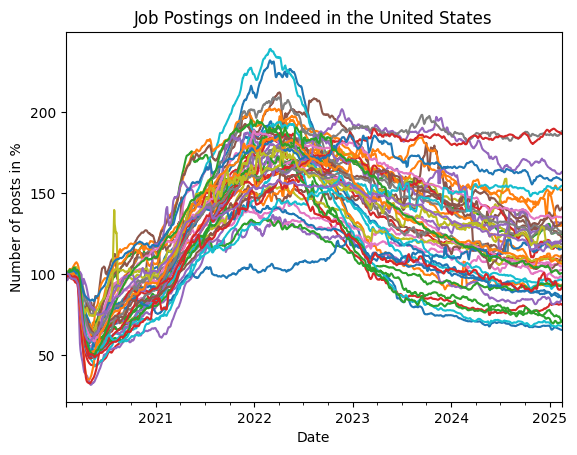

In [6]:
data.plot(legend=False)
plt.xlabel('Date')
plt.ylabel('Number of posts in %')
plt.title('Job Postings on Indeed in the United States')
plt.savefig('Job Postings on Indeed in the United States.png')
plt.show()


### Performing PCA to standardized data ###

In [7]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data.dropna())
cov_mat = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
PC = np.matmul(standardized_data,eigenvectors)

x = np.cumsum(eigenvalues/np.sum(eigenvalues))

print('The first two principal components capture', np.round(x[1],2), '% of the variance')

The first two principal components capture 0.96 % of the variance


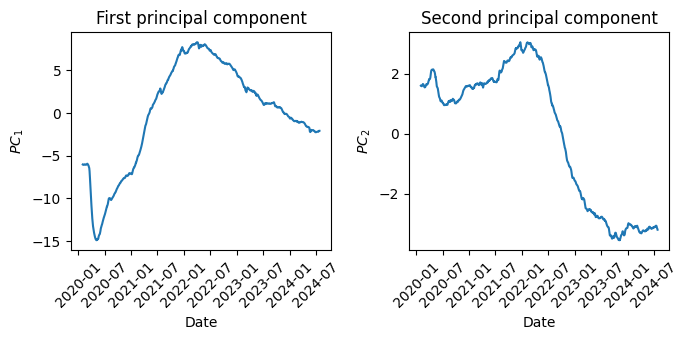

In [8]:
plt.figure(figsize = (7,3.5))
plt.subplot(1,2,1)
plt.plot(data.dropna().index,PC[:,0])
plt.xticks(rotation = 45)
plt.ylabel(r'$PC_1$')
plt.xlabel('Date')
plt.title('First principal component')
plt.subplot(1,2,2)
plt.plot(data.dropna().index,PC[:,1])
plt.xticks(rotation = 45)
plt.ylabel(r'$PC_2$')
plt.xlabel('Date')
plt.title('Second principal component')
plt.tight_layout()
plt.savefig('Principal components.png')
plt.show()

### Performing OLS to standardized data using the two first princpal components ###

In [9]:
# Fitting two principal components
num_comp = 2

params = np.zeros((len(Labels),num_comp))
r_squared = np.zeros(len(Labels))

for i in range(0,len(Labels)):
    model = sm.OLS(standardized_data[:,i], PC[:,0:num_comp ])
    results = model.fit()
    params[i,:] = results.params
    r_squared[i] = results.rsquared


In [10]:
print('The mean value of r squared is ',np.round(np.mean(r_squared),2))
print('The standard deviation of r squared is ',np.round(np.std(r_squared),2))

The mean value of r squared is  0.96
The standard deviation of r squared is  0.03


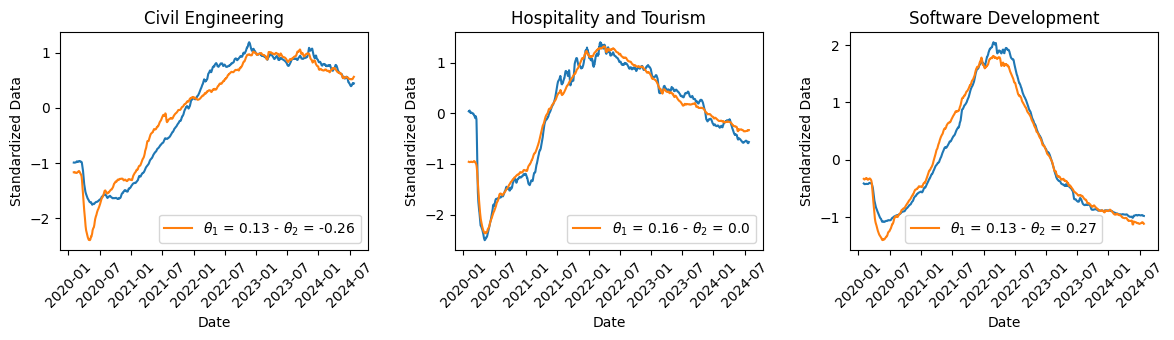

In [11]:
index = 14
index2 = 4
index3 = 0

plt.figure(figsize = (12,3.5))
plt.subplot(1,3,1)
plt.plot(data.dropna().index,standardized_data[:,index])
plt.plot(data.dropna().index,PC[:,0]*params[index,0] + PC[:,1]*params[index,1],label = rf"$\theta_1$ = {np.round(params[index,0],2)} - $\theta_2$ = {np.round(params[index,1],2)}")
plt.title(rf"{Labels[index]}")
plt.xticks(rotation = 45)
plt.ylabel('Standardized Data')
plt.xlabel('Date')
plt.legend()
plt.subplot(1,3,2)
plt.plot(data.dropna().index,standardized_data[:,index2])
plt.plot(data.dropna().index,PC[:,0]*params[index2,0] + PC[:,1]*params[index2,1], label = rf"$\theta_1$ = {np.round(params[index2,0],2)} - $\theta_2$ = {np.round(params[index2,1],2)}")
plt.title(rf"{Labels[index2]}")
plt.xticks(rotation = 45)
plt.ylabel('Standardized Data')
plt.xlabel('Date')
plt.legend()
plt.subplot(1,3,3)
plt.plot(data.dropna().index,standardized_data[:,index3])
plt.plot(data.dropna().index,PC[:,0]*params[index3,0] + PC[:,1]*params[index3,1], label = rf"$\theta_1$ = {np.round(params[index3,0],2)} - $\theta_2$ = {np.round(params[index3,1],2)}")
plt.title(rf"{Labels[index3]}")
plt.xticks(rotation = 45)
plt.ylabel('Standardized Data')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.savefig('Principal components and fit.png')
plt.show()



## Plots of $\theta_1$ vs $\theta_2$, Last value vs. $\theta_2$ and histogram for $\theta_2$. ##

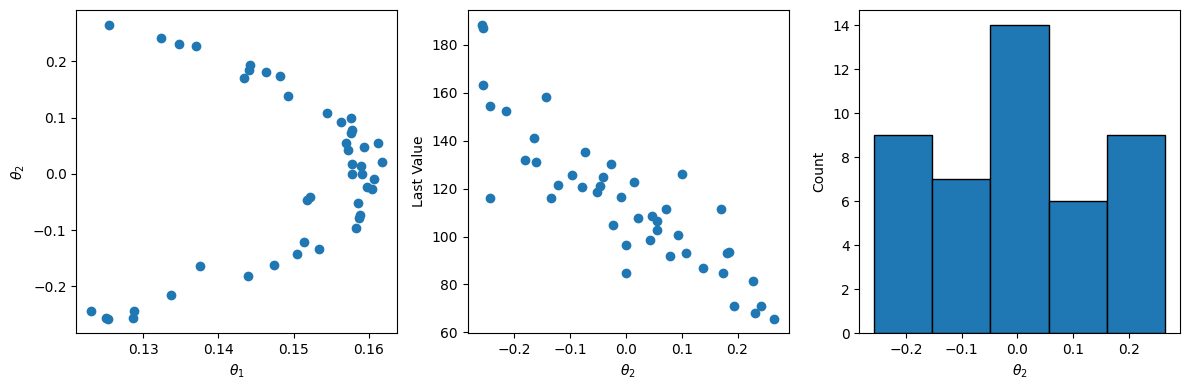

In [12]:
last_values = data.iloc[-1]

plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot(params[:,0],params[:,1], 'o')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')

plt.subplot(1,3,2)
plt.plot(params[:,1],last_values,'o')
plt.xlabel(r'$\theta_2$')
plt.ylabel('Last Value')

plt.subplot(1,3,3)
counts, bin_edges, _  = plt.hist(params[:,1],bins = 'fd',edgecolor="black")
plt.xlabel(r'$\theta_2$')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Dependence with Theta 2.png')
plt.show()

## Dividing fields according to their bin in the histogram ##

In [13]:
# Print bin edges
print("Bin edges:", np.round(bin_edges,3))

Bin edges: [-0.257 -0.153 -0.048  0.056  0.161  0.265]


In [14]:
filtered_labels1 = [Labels[i] for i in range(len(params[:,1])) if bin_edges[0] <= params[i,1] <= bin_edges[1]]
print(filtered_labels1)

['Civil Engineering', 'Driving', 'Physicians and Surgeons', 'Dental Job', 'Beauty and Wellness', 'Veterinary', 'Therapy', 'Education and Instruction', 'Sports']


In [15]:
filtered_labels2 = [Labels[i] for i in range(len(params[:,1])) if bin_edges[1] <= params[i,1] <= bin_edges[2]]
print(filtered_labels2)

['Nursing', 'Electrical Engineering', 'Childcare', 'Medical Technician', 'Community and Social Service', 'Personal Care and Home Health', 'Installation and Maintenance']


In [16]:
filtered_labels3 = [Labels[i] for i in range(len(params[:,1])) if bin_edges[2] <= params[i,1] <= bin_edges[3]]
print(filtered_labels3)

['Construction', 'Hospitality and Tourism', 'Accounting', 'Retail', 'Project Management', 'Food Preparation and Service', 'Management', 'Legal', 'Cleaning and Sanitation', 'Insurance', 'Architecture', 'Pharmacy', 'Security and Public Safety', 'Administrative Assistance']


In [17]:
filtered_labels4 = [Labels[i] for i in range(len(params[:,1])) if bin_edges[3] <= params[i,1] <= bin_edges[4]]
print(filtered_labels4)

['Production and Manufacturing', 'Sales Job', 'Customer Service Job', 'Logistic Support', 'Medical Information', 'Arts and Entertainment']


In [18]:
filtered_labels5 = [Labels[i] for i in range(len(params[:,1])) if bin_edges[4] <= params[i,1] <= bin_edges[5]]
print(filtered_labels5)

['Software Development', 'Banking and Finance', 'Marketing', 'Human Resources', 'Scientific Research and Development', 'Information Design and Documentation', 'Mathematics', 'Loading and Stocking', 'Media and Communications']


### Simulation of the dynamical systems model ###

In [19]:
dt = 0.01
iter = 10000
a = np.arange(0.1,0.2+0.001,0.001)

H = np.zeros((iter+1,len(a)))
C = np.zeros((iter+1,len(a)))
t = np.zeros(iter+1)


H[0,:] = 0.01 + 0.65

for j in range(0,len(a)):
  for i in range(0,iter):
    H[i+1,j] = H[i,j] + dt*((a[j]-C[i,j])*(H[i,j]-0.65)-0.0484*(H[i,j]-0.65)**3)
    C[i+1,j] = C[i,j] + dt*0.055*(a[j]-0.1)*(H[i,j]-0.65)
    t[i+1] = t[i] + dt

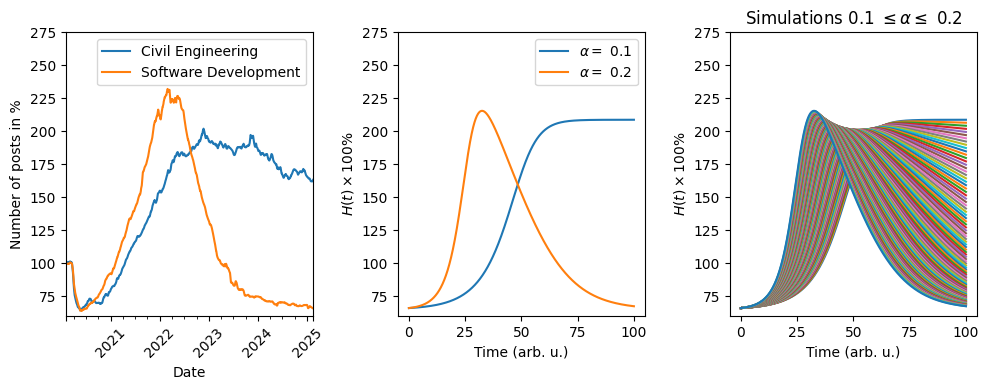

In [20]:
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
data[Labels[index]].plot()
data[Labels[index3]].plot()
plt.legend([Labels[index],Labels[index3]])
plt.ylabel('Number of posts in %')
plt.xlabel('Date')
plt.ylim(60,275)
plt.xticks(rotation = 45)
plt.subplot(1,3,2)
plt.plot(t,H[:,0]*100, label = fr'$\alpha = $ {a[0]}')
plt.plot(t,H[:,-1]*100, label = fr'$\alpha = $ {np.round(a[-1],2)}')
plt.xlabel('Time (arb. u.)')
plt.ylabel(r'$H(t) \times 100 \%$')
plt.ylim(60,275)
plt.legend()
plt.subplot(1,3,3)
plt.plot(t,H*100)
plt.title(rf'Simulations {a[0]} $ \leq \alpha \leq $ {np.round(a[-1],2)}')
plt.xlabel('Time (arb. u.)')
plt.ylabel(r'$H(t) \times 100 \%$')
plt.ylim(60,275)
plt.tight_layout()
plt.savefig('Instantaneous model.png')
plt.show()

## Performing PCA and OLS to the simulated data ##

In [21]:
### Performing PCA ###
scaler = StandardScaler()
nx= scaler.fit_transform(H)
cov_mat = np.cov(nx, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
PC = np.matmul(nx,eigenvectors)

# Fitting two principal components
num_comp = 2

params = np.zeros((len(a),num_comp))
r_squared = np.zeros(len(a))

for i in range(0,len(a)):
    model = sm.OLS(nx[:,i], PC[:,0:num_comp ])
    results = model.fit()
    params[i,:] = results.params
    r_squared[i] = results.rsquared

<ipython-input-21-68b8cff34b8a>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  params[i,:] = results.params
<ipython-input-21-68b8cff34b8a>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  r_squared[i] = results.rsquared


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


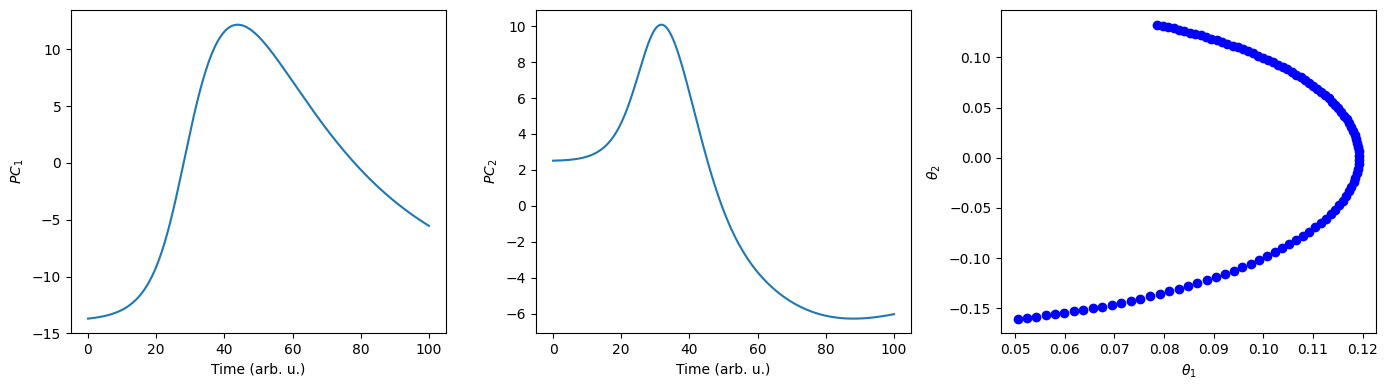

In [22]:
plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
plt.plot(t,PC[:,0])
plt.xlabel('Time (arb. u.)')
plt.ylabel(r'$PC_1$')
plt.subplot(1,3,2)
plt.plot(t,PC[:,1])
plt.xlabel('Time (arb. u.)')
plt.ylabel(r'$PC_2$')
plt.subplot(1,3,3)
plt.plot(params[:,0],params[:,1],'ob')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.tight_layout()
plt.savefig('Instantaneous model PCA.png')
plt.show()